# Importing Libraries

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

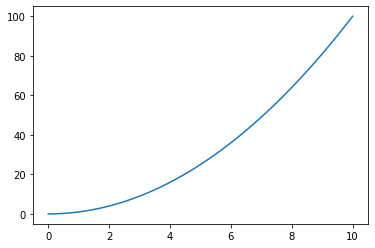

In [6]:
x=np.linspace(0,10)
y=x**2
plt.plot(x,y)

In [27]:
df=pd.read_csv("./CPP_code/cluster_statistics.dat",header=None,index_col=None,sep="  ")
print(df)

      0    1    2    3    4    5    6    7    8    9    ...  147  148  149  \
0      56   22    8    4    2    1    0    0    0    0  ...    0    0    0   
1      55   25    6    3    2    0    0    0    0    0  ...    0    0    0   
2      56   25    6    3    4    0    0    0    0    0  ...    0    0    0   
3      65   15    8    4    3    1    0    0    0    0  ...    0    0    0   
4      56   19   11    2    3    1    0    0    0    0  ...    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
996    66   10    8    3    3    2    1    0    0    0  ...    0    0    0   
997    59   16    8    1    2    2    1    1    0    0  ...    0    0    0   
998    60   16   10    2    4    1    0    0    0    0  ...    0    0    0   
999    59   13    8    5    3    2    0    0    0    0  ...    0    0    0   
1000   61   15    6    4    1    3    0    1    0    0  ...    0    0    0   

      150  151  152  153  154  155  156  
0       0    0    0  